# Classification with Logistic Regression

***Summary***
- Classification Intro
- Scikit-Learn
- Multiclass Logistic Regression (Iris Dataset)

***Table of Contents:*** 
- [Classification Introduction](#classification-intro)

**Original Sources**: http://scikit-learn.org,http://archive.ics.uci.edu/ml/datasets/Iris <br>
**License**: Feel free to do whatever you want to with this code <br>
**Author List**: Chad Wakamiya (Summer 2020); Sana Iqbal (Fall 2017); Kevin Li, Ikhlaq Sidhu (Spring 2017)

***
## I. Classification Introduction 

Our  predictive machine learning models perform two types of tasks:

### i. Classification vs. Regression

#### Classification
- **Labels**: DISCRETE
- **Goal**: On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.
- **Example**: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

#### Regression

- **Labels**: CONTINUOUS
- **Goals:** On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.
- **Example**: We train our model using income and expenditure data of bank customers using  __default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


### ii. Scikit-learn
* Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python

* This library is built upon SciPy (Scientific Python)

* The library is focused on modeling data. It is not focused on loading, manipulating and summarizing data 

* We can do supervised and unsupervised learning with Scikit-learn

## II. Machine Learing Model Steps

### i. Understand the date
Understand your dataset using graphs, descriptive analysis etc. Check for feature type - categorical or numerical.

### ii. Clean and preprocess the data
Removing outliers, Imputation of Null values, Removing null values

### iii. Building the model
Divide the dataset into training and validation subsets. Build using appropriate algorithms. Fit models with training data  using scikit-learn library. Calculate training error,this gives you the idea of bias in your model.

### iv. Testing and iteration
Having testing outcomes and improve through each iteration. Test model prediction accuracy using validation data,this gives you bias and variance error in the model.

***
# Iris Classification Example

**Problem**: 'Iris 'setosa' species has medicinal benefits and we want to make the process of identifying an iris species scalable'  


## I. Understanding the data



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('iris_classification.csv')

# lets us look at the data
data.head(5)

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


### i. How many observations for each label?

In [3]:
# lets us check unique labels:
data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [4]:
from sklearn.utils import shuffle
# SHUFFLE data instances to randomize the distribution of different classes
# Check if data has any NAN  values, you can choose to drop NAN 
# containing rows or replace NAN  values with mean. median,or any assumed value.

data= shuffle(data).reset_index(drop=True)

### ii. Check for NaN values

In [5]:
print('Number of NaNs in the dataframe:\n',data.isnull().sum())
data.head()

Number of NaNs in the dataframe:
 sepal_length    0
sepal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,species
0,6.1,2.6,virginica
1,5.8,2.6,versicolor
2,5.8,2.7,virginica
3,5.1,3.5,setosa
4,5.6,2.8,virginica


### iii. Split into X and Y vectors

In [6]:
# Our functions take in features and labels as arrays  so we need to separate them 
# GET FEATURES X FROM THE DATA

X=data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width
0,6.1,2.6
1,5.8,2.6
2,5.8,2.7
3,5.1,3.5
4,5.6,2.8


In [7]:
# GET LABELS Y FROM THE DATA
Y=data['species']
print (Y.value_counts()) #gives the count of each label in the dataset

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64


In [8]:
print ('''\nWe will map our class labels to integers and then use in modeling.
The mapping is:'versicolor': 0, 'virginica': 1,'setosa' :2 \n''')

Y=Y.map({'versicolor': 0, 'virginica': 1,'setosa' :2})
print (Y.value_counts()) #gives the count of each label in the dataset

Y.head()



We will map our class labels to integers and then use in modeling.
The mapping is:'versicolor': 0, 'virginica': 1,'setosa' :2 

2    50
1    50
0    50
Name: species, dtype: int64


0    1
1    0
2    1
3    2
4    1
Name: species, dtype: int64

In [9]:
# should do sanity check on data often
print("Feature vector shape=", X.shape)
print("Class shape=", Y.shape)


Feature vector shape= (150, 2)
Class shape= (150,)


### iv. Visualize feature distributions

In [10]:
# More summary about our data
data.describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


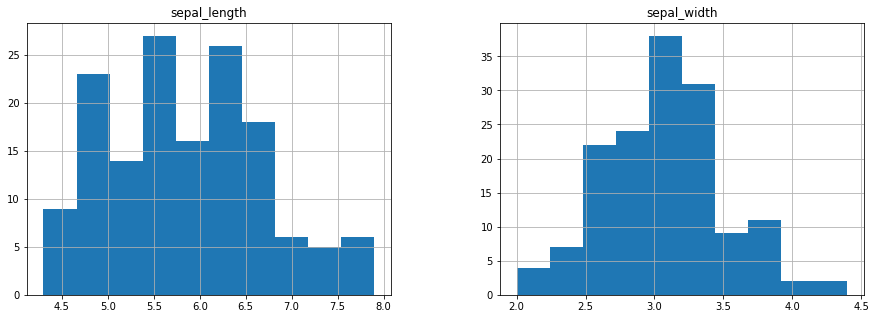

In [11]:
# Get feature distribution of each continuous valued feature (sepal_length and sepal_width)
data.hist(figsize=(15,5))
plt.show()

            sepal_length  sepal_width
species                              
setosa                50           50
versicolor            50           50
virginica             50           50


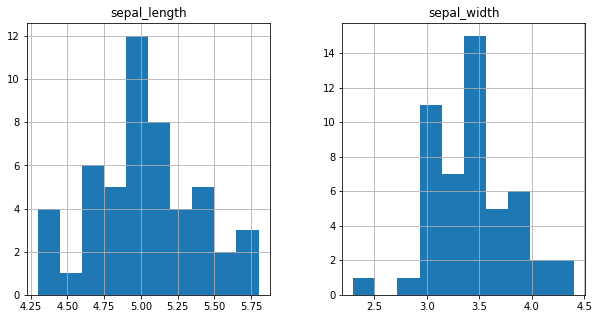

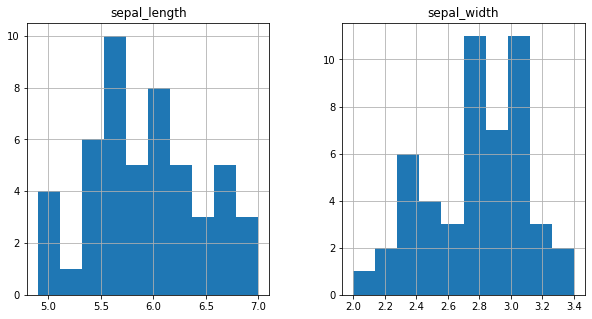

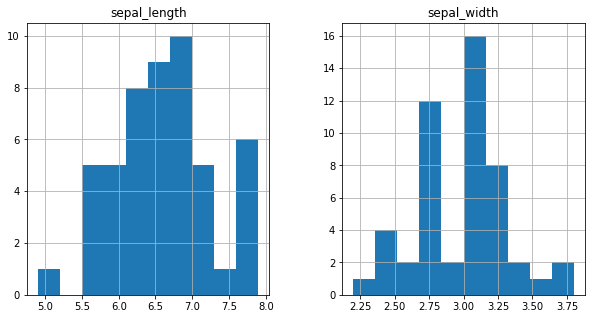

In [12]:
# Check feature distribution of each class, to get an overview of feature and class relationshhip,
# also useful in validating data
print(data.groupby('species').count())

data.groupby('species').hist(figsize=(10,5))
plt.show()

## III. Building the Model

### i. Split into Training, Validation, and Test Set

Our Hypothesis : Species of Iris is dependent on sepal length and width of the flower. 
In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Test data__.

Test data labels are predicted using the trained model and compared with the actual labels of the data.This gives us the idea about how well the model can be trusted for its predictive power.

* __Training set__ : The sample of data used to fit your model.

* __Test set__ : The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. 

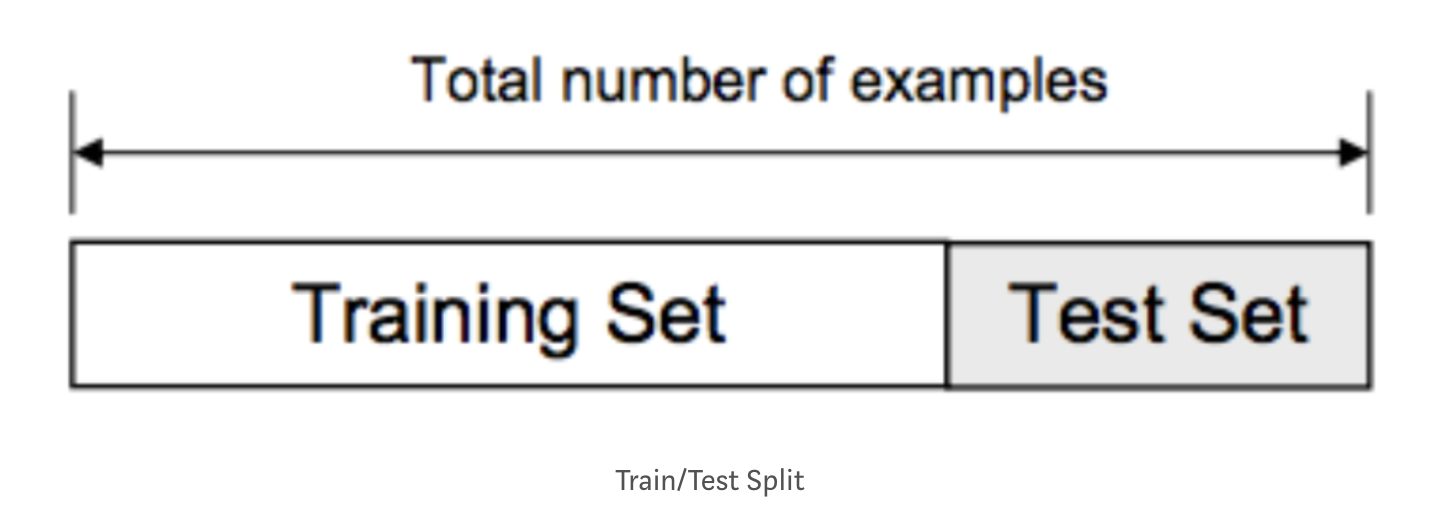


* __Validation set__: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters


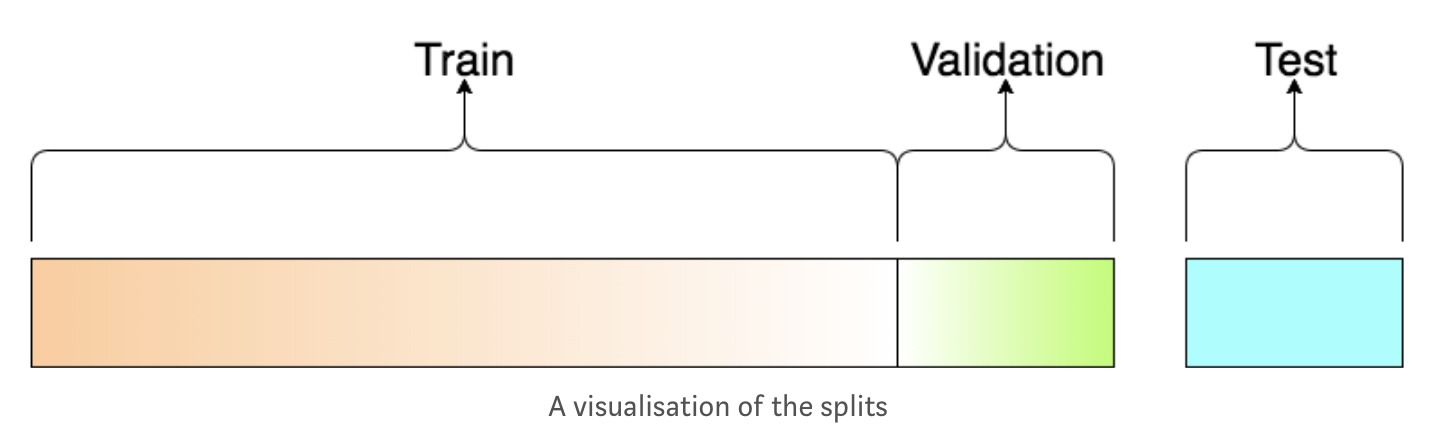

----------------------------------------------------------------------------------------------------------------------

In [13]:
# Split data into training and test set using sklearn function

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print ('Number of samples in training data:',len(x_train))
print ('Number of samples in test data:',len(x_test))

Number of samples in training data: 120
Number of samples in test data: 30


### ii. Training a Logistic Regression Model with Scikit-Learn
Further Reading: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

In [14]:
from sklearn import linear_model

# Name our logistic regression object
LogisticRegressionModel = linear_model.LogisticRegression(solver = 'newton-cg', multi_class='multinomial')

# we create an instance of logistic Regression Classifier and fit the data.
print ('Training a logistic Regression Model..')
LogisticRegressionModel.fit(x_train, y_train)

Training a logistic Regression Model..


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### iii. Training Accuracy

In [15]:
# TRAINING ACCURACY

training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)

Training Accuracy: 0.8083333333333333


In [16]:
# Lets us see how it is done ab-initio. Estimate prediction error logically for each sample 
# and save it in an array called Loss_Array


# this line below will predict a category for every row in x_train
predicted_label = LogisticRegressionModel.predict(x_train)    

def find_error(actual_label,predicted_label):
    '''actual_label= label in data
        predicted_label= label predicted by the model
        
    '''
    
    Loss_Array = np.zeros(len(actual_label)) #create an empty array to store loss values
#     print(Loss_Array)
    
    for i,value in enumerate(actual_label):
        
        if value == predicted_label[i]: 
            Loss_Array[i] = 0
        else:
            Loss_Array[i] = 1

    print ("Y-actualLabel   Z-predictedLabel   Error \n")
    for i,value in enumerate(actual_label):
        print (value,"\t\t" ,predicted_label[i],"\t\t",Loss_Array[i])
        
    error_rate=np.average(Loss_Array)
    print ("\nThe error rate is ", error_rate)
    print ('\nThe accuracy of the model is ',1-error_rate )
    
    
find_error(y_train,predicted_label)

Y-actualLabel   Z-predictedLabel   Error 

2 		 2 		 0.0
2 		 2 		 0.0
1 		 0 		 1.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
0 		 1 		 1.0
1 		 1 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 1 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
2 		 2 		 0.0
0 		 0 		 0.0
1 		 1 		 0.0
2 		 2 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
2 		 2 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
0 		 1 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
0 		 1 		 1.0
2 		 2 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
0 		 1 		 1.0
1 		 1 		 0.0
0 		 0 		 0.0
1 		 1 		 0.0
0 		 1 		 1.0
0 		 1 		 1.0
1 		 

## IV. Testing the Model (Confusion Matrix)

In [33]:
# TEST ACCURACY: 
# we will find accuracy of the model using data that was not used for training the model

test_accuracy = LogisticRegressionModel.score(x_test,y_test)
print('Accuracy of the model on unseen test data: ', test_accuracy)

Accuracy of the model on unseen test data:  0.8333333333333334


> **Accuracy can be misleading.** Accuracy measures the observations the model was able to predict correctly. We also should check the proportion of time the model was wrong. 

### i. Measuring Performance

To formally define this error, we classify predications as:
- **True Positive** - predicted positive correctly
- **True Negative** - predicted negative correctly
- **False Positive** - predicted positive, actually negative (wrong)
- **False Negative** - predicted negative, actually positive (wrong)

**Accuracy** measures the number correctly classified positive observations out of all observations that are actually positive.

 $$ Accuracy = \frac{True \space Positive + True \space Negative } {All \space Observations} $$


**Precision** measures the the number of correctly classified positive observations out of all observations it predicted positive for.

 $$ Precision = \frac{True \space Positive} {True  \space Positives + False \space Positives} $$
 
 **Recall** measures the number correctly classified positive observations out of all observations that are actually positive.

 $$ Recall = \frac{True \space Positive} {True  \space Positives + False \space Negatives} $$

### ii. Confusion matrix 

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

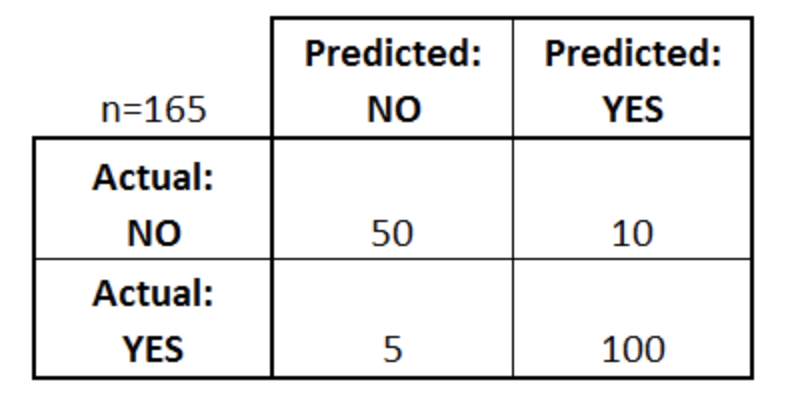


In [18]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = LogisticRegressionModel.predict(x_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0            6            3            0
Actual 1            1            6            0
Actual 2            1            0           13


In [19]:
from sklearn.metrics import precision_score
print("Average precision for the 3 classes is - ", precision_score(y_true, y_pred, average = None) )

Average precision for the 3 classes is -  [0.75       0.66666667 1.        ]


In [20]:
from sklearn.metrics import recall_score
print("Average recall for the 3 classes is - ", recall_score(y_true, y_pred, average = None) )

Average recall for the 3 classes is -  [0.66666667 0.85714286 0.92857143]


## V.  Visualizing the Results

In [21]:
# PLOT THE DECISION BOUNDARIES:
# 1.create meshgrid of all points between 

'''
For that we will create a mesh between [x_min, x_max]x[y_min, y_max].
We will choose a 2d vector space ranging from values +- 0.5 from our 
min and max values of sepal_length and sepal_width.
Then we will divide that whole region in a grid of  0.02 units cell size.

'''

h = 0.02  # step size in the mesh
x_min = X['sepal_length'].min() - .5
x_max = X['sepal_length'].max() + .5
y_min = X['sepal_width'].min() - .5
y_max = X['sepal_width'].max() + .5



# print x_min, x_max, y_min, y_max

sepal_length_range = np.arange(x_min, x_max, h)
sepal_width_range = np.arange(y_min, y_max, h)



# Create datapoints for the mesh
sepal_length_values, sepal_width_values = np.meshgrid(sepal_length_range, sepal_width_range)


# Predict species for the fictious data in meshgrid
predicted_species = LogisticRegressionModel.predict(np.c_[sepal_length_values.ravel(), sepal_width_values.ravel()])

print ('Finished predicting species')

# another approach is to make an array Z2 which has all the predicted values in (xr,yr).  

predicted_species2= np.arange(len(sepal_length_range)*len(sepal_width_range)).reshape(len(sepal_length_range),len(sepal_width_range))
for yni in range(len(sepal_width_range)):
    for xni in range(len(sepal_length_range)):
#         print (xni, yni, LogisticRegressionModel.predict([[xr[xni],yr[yni]]]))

        predicted_species2[xni,yni] =LogisticRegressionModel.predict([[sepal_length_range[xni],sepal_width_range[yni]]])
print ('Finished predicted_species2')

Finished predicting species
Finished predicted_species2


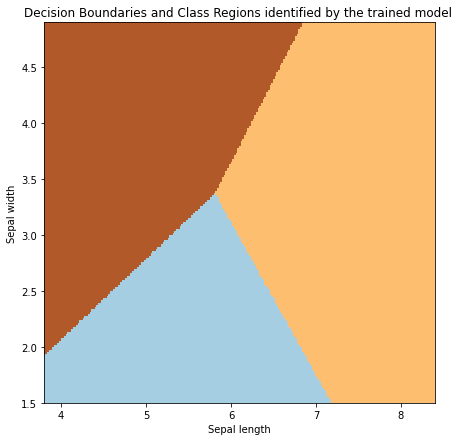

In [22]:
# Put the result into a color plot
predicted_species = predicted_species.reshape(sepal_length_values.shape)
plt.figure(figsize=(7,7))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species , cmap=plt.cm.Paired)
plt.title('Decision Boundaries and Class Regions identified by the trained model ')
#plt.colorbar()
plt.show()


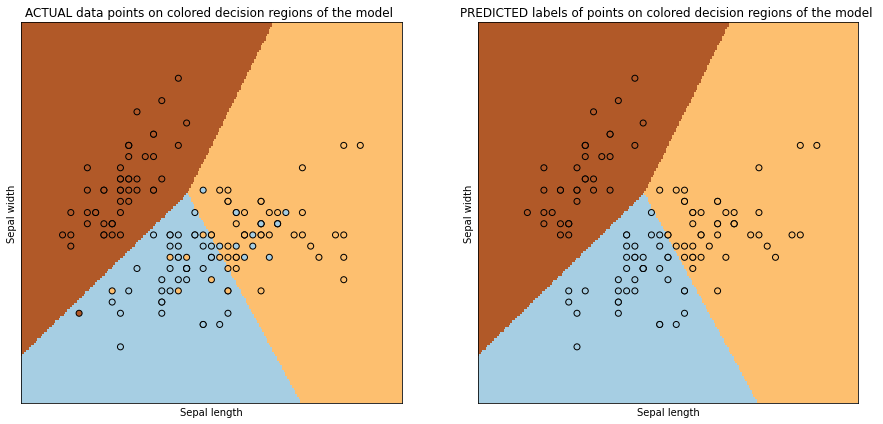

In [23]:
# Plot also the training points

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

plt.subplot(1,2,1)
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species , cmap=plt.cm.Paired)

plt.scatter(X['sepal_length'], X['sepal_width'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
#plt.colorbar()
plt.xlim(sepal_length_values.min(),sepal_length_values.max())
plt.ylim(sepal_width_values.min(), sepal_width_values.max())
plt.xticks(())
plt.yticks(())
plt.title('ACTUAL data points on colored decision regions of the model ')

# Put the result into a color plot of decison boundary

plt.subplot(1,2,2)
plt.title('PREDICTED labels of points on colored decision regions of the model ')
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species, cmap=plt.cm.Paired)
#plt.colorbar()
label=np.unique(y_test)

plt.scatter(x_train['sepal_length'], x_train['sepal_width'], c=predicted_label, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(sepal_length_values.min(),sepal_length_values.max())
plt.ylim(sepal_width_values.min(), sepal_width_values.max())
plt.xticks(())
plt.yticks(())



plt.show()

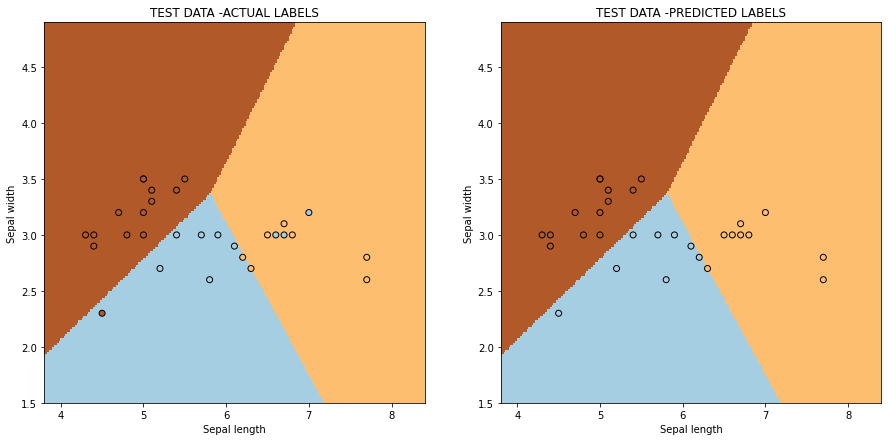

In [24]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

plt.subplot(1,2,1)
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species, cmap=plt.cm.Paired)
#plt.colorbar()
label=np.unique(y_test)
plt.title('TEST DATA -ACTUAL LABELS')
# Plot also the training points
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_test,label=np.unique(y_test), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


plt.subplot(1,2,2)
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species, cmap=plt.cm.Paired)
#plt.colorbar()
# Plot also the training points
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=LogisticRegressionModel.predict(x_test), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('TEST DATA -PREDICTED LABELS')


plt.show()

## VI. Improving the Model With Scaling:

## II. Cleaning the Data

### i. Remove NaN values and/or impute missing values
We do not have any NA values in the dataset
- Use Pandas functions to remove na values, **Sklearn.preprocessing.Imputer** to impute the missing values.
- Scaling the variables using  **sklearn.preprocessing.StandardScaler**
    - The standard score of a sample x is calculated as:

        z = (x - u) / s
- Scaling using Sklearn Min Max scaler
  - X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    
    X_scaled = X_std * (max - min) + min

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [26]:
x_train_s, x_test_s, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=100)


# Name our logistic regression object
LogisticRegressionModel_s = linear_model.LogisticRegression(solver = 'newton-cg', multi_class='multinomial')

# we create an instance of logistic Regression Classifier and fit the data.
print ('Training a logistic Regression Model..')
LogisticRegressionModel_s.fit(x_train_s, y_train)

training_accuracy_s=LogisticRegressionModel_s.score(x_train_s,y_train)
print ('Training Accuracy:',training_accuracy_s)

test_accuracy_s=LogisticRegressionModel_s.score(x_test_s,y_test)
print('Accuracy of the model on unseen test data: ',test_accuracy_s)



Training a logistic Regression Model..
Training Accuracy: 0.8
Accuracy of the model on unseen test data:  0.8


No difference! Some models/datasets do vastly change when scaling is applied (ex: neural networks, datasets with vastly different ranges in different columns)

In [27]:
np.unique(Y)

array([0, 1, 2], dtype=int64)